In [1]:
install.packages("corrplot")
install.packages("PerformanceAnalytics")
library(corrplot)
library("PerformanceAnalytics")
library(ggplot2)

package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\daxel\AppData\Local\Temp\Rtmpeowb9G\downloaded_packages
package 'PerformanceAnalytics' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\daxel\AppData\Local\Temp\Rtmpeowb9G\downloaded_packages


Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded
Warning message:
"package 'PerformanceAnalytics' was built under R version 3.6.3"Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Attaching package: 'PerformanceAnalytics'

The following object is masked from 'package:graphics':

    legend

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

# REFLECTANCE DE SURFACE

In [2]:
library(readxl)
data <- read_excel(
    path = "Desktop\\Memoire\\bases_de_donnees\\jeux_donnees\\i_SR.xlsx",
    sheet = 4, 
    col_names = TRUE)
head(data,2)

date,Turbidité,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12
2017-04-03,7.188,53.5,174.5,354.5,231.5,204.0,110.5,125.5,132.0,129,103,144.5,101.0
2017-05-26,2.969,294.0,228.5,305.0,193.5,150.5,37.0,51.5,54.5,71,190,224.0,182.5


# Vérification log

In [13]:
model <- Turbidité ~ Débit
fit <- lm(model, dt)
summ3 <- summary(fit)
summ3
mean(summ3$residuals^2)
BIC(fit)
sqrt(mean(summ3$residuals^2))

dt$l.turbi <- log(dt$Turbidité)
dt$l.débit <- log(dt$Débit)
modeln <- l.turbi ~ l.débit
fitln <- lm(modeln, dt)
summ4 <- summary(fitln)
summ4
mean(summ4$residuals^2)
BIC(fitln)
sqrt(mean(summ4$residuals^2))

dt$log.turbi <- log10(dt$Turbidité)
dt$log.débit <- log10(dt$Débit)
modelog <- log.turbi ~ log.débit
fitlog <- lm(modelog, dt)
summ5 <- summary(fitlog)
summ5
mean(summ5$residuals^2)
BIC(fitlog)
sqrt(mean(summ5$residuals^2))


Call:
lm(formula = model, data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-54.224  -3.937  -1.046   1.637  78.974 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.315560   0.271654   8.524   <2e-16 ***
Débit       0.056040   0.001122  49.949   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12.46 on 3778 degrees of freedom
Multiple R-squared:  0.3977,	Adjusted R-squared:  0.3976 
F-statistic:  2495 on 1 and 3778 DF,  p-value: < 2.2e-16


[1] 155.2316

[1] 29821.68

[1] 12.4592


Call:
lm(formula = modeln, data = dt)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.48628 -0.47028  0.06216  0.50477  2.04174 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.22247    0.05550  -22.02   <2e-16 ***
l.débit      0.67415    0.01186   56.83   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7278 on 3778 degrees of freedom
Multiple R-squared:  0.4608,	Adjusted R-squared:  0.4607 
F-statistic:  3229 on 1 and 3778 DF,  p-value: < 2.2e-16


[1] 0.5294427

[1] 8348.071

[1] 0.7276281


Call:
lm(formula = modelog, data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0798 -0.2042  0.0270  0.2192  0.8867 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.53091    0.02411  -22.02   <2e-16 ***
log.débit    0.67415    0.01186   56.83   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3161 on 3778 degrees of freedom
Multiple R-squared:  0.4608,	Adjusted R-squared:  0.4607 
F-statistic:  3229 on 1 and 3778 DF,  p-value: < 2.2e-16


[1] 0.09985909

[1] 2042.786

[1] 0.3160049

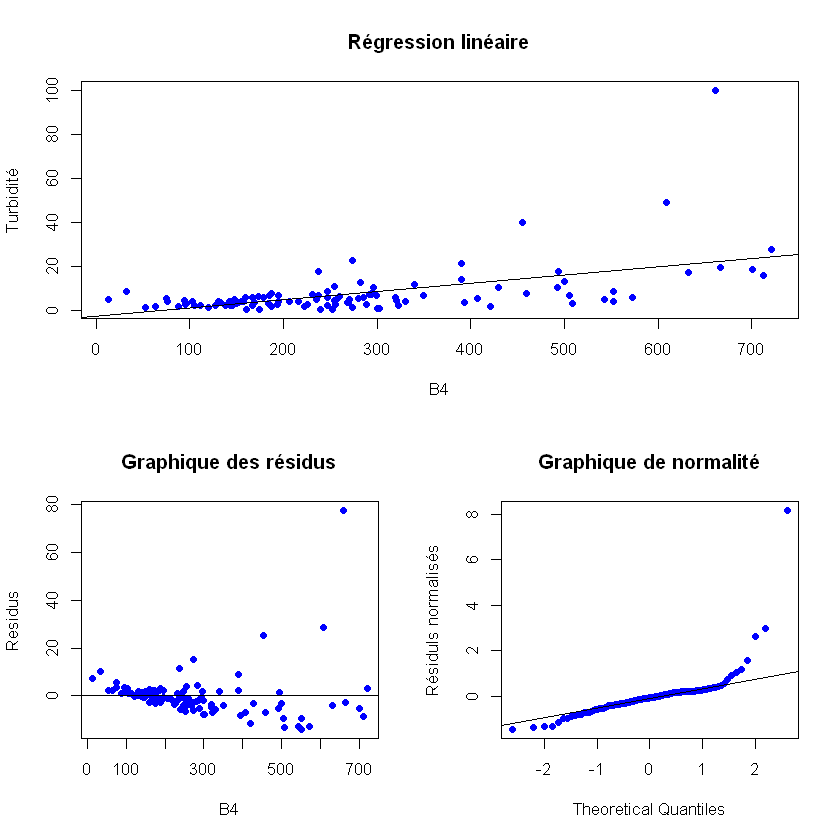

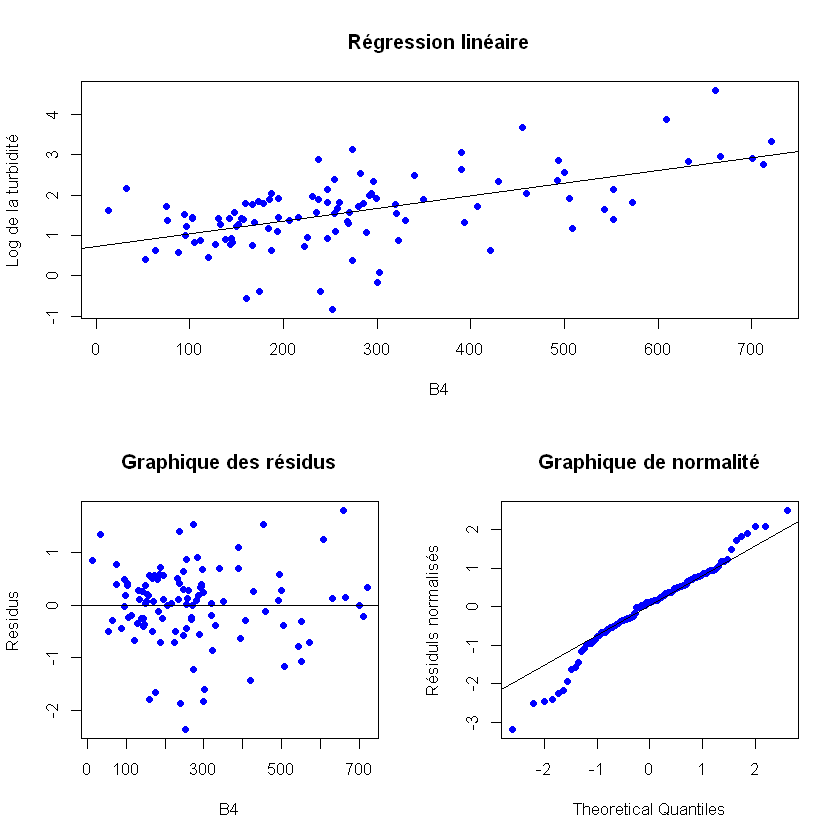

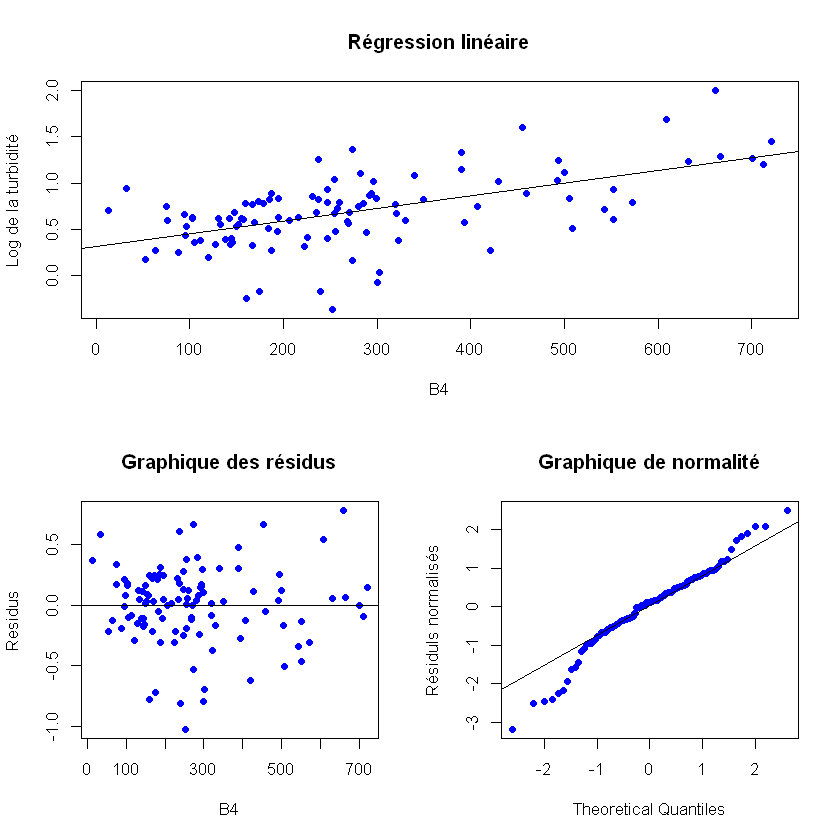

In [7]:
layout(matrix(c(1,1,2,3), 2, 2, byrow = TRUE))

x = dt$Débit
y = dt$Turbidité
plot(x, y,
  xlab="Débit",
  ylab="Turbidité",
    main="Régression linéaire",
    col="blue", pch = 16)
abline(lm(y ~ x))

res <- resid(fit)
plot(dt$Débit, res, 
    ylab="Résidus", xlab="Débit", 
    main="Graphique des résidus",
         col="blue", pch = 16) 
abline(0, 0)

stdres = rstandard(fit)
qqnorm(stdres, 
    ylab="Résiduls normalisés", 
    main="Graphique de normalité",
      col="blue", pch = 16) 
qqline(stdres)

############################## LOG TURBI ##############################

layout(matrix(c(1,1,2,3), 2, 2, byrow = TRUE))

x1 = dt$Débit
y1 = dt$log.turbi
plot(x1, y1,
  xlab="Débit",
  ylab="Log de la turbidité",
    main="Régression linéaire",
    col="blue", pch = 16)
abline(lm(y1 ~ x1))

res <- resid(fitlog)
plot(dt$Débit, res, 
    ylab="Residus", xlab="Débit", 
    main="Graphique des résidus",
         col="blue", pch = 16) 
abline(0, 0)

stdres = rstandard(fitlog)
qqnorm(stdres, 
    ylab="Résiduls normalisés", 
    main="Graphique de normalité",
      col="blue", pch = 16) 
qqline(stdres)

############################## LOG TURBI ET LOG DEBIT ##############################

layout(matrix(c(1,1,2,3), 2, 2, byrow = TRUE))

x2 = dt$log.débit
y2 = dt$log.turbi
plot(x2, y2,
  xlab="Log du débit",
  ylab="Log de la turbidité",
    main="Régression linéaire",
    col="blue", pch = 16)
abline(lm(y2 ~ x2))

res <- resid(fitlog2)
plot(dt$log.débit, res, 
    ylab="Residus", xlab="Log du débit", 
    main="Graphique des résidus",
         col="blue", pch = 16) 
abline(0, 0)

stdres = rstandard(fitlog2)
qqnorm(stdres, 
    ylab="Résiduls normalisés", 
    main="Graphique de normalité",
      col="blue", pch = 16) 
qqline(stdres)

# Normal

In [3]:
model <- Turbidité ~ B4
fit <- lm(model, data)
summ1 <- summary(fit)
summ1
mean(summ1$residuals^2)

data$log.turbi <- log10(data$Turbidité)
modelog <- log.turbi ~ B4
fitlog <- lm(modelog, data)
summ2 <- summary(fitlog)
summ2
mean(summ2$residuals^2)


Call:
lm(formula = model, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.133  -3.769  -0.630   1.853  77.556 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.584500   1.858593  -1.391    0.167    
B4           0.037622   0.005828   6.456 3.32e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.812 on 106 degrees of freedom
Multiple R-squared:  0.2822,	Adjusted R-squared:  0.2754 
F-statistic: 41.68 on 1 and 106 DF,  p-value: 3.32e-09


[1] 94.49149


Call:
lm(formula = modelog, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.02599 -0.15935  0.03635  0.17746  0.78242 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.3174484  0.0612664   5.181 1.06e-06 ***
B4          0.0013612  0.0001921   7.086 1.59e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3234 on 106 degrees of freedom
Multiple R-squared:  0.3214,	Adjusted R-squared:  0.315 
F-statistic:  50.2 on 1 and 106 DF,  p-value: 1.592e-10


[1] 0.102676

In [4]:
x = data$B4
y = data$Turbidité
#plot(x, y,
#  xlab="B4",
#  ylab="Turbidité",
#    main="Régression linéaire",
#    col="blue", pch = 16)
#abline(lm(y ~ x))

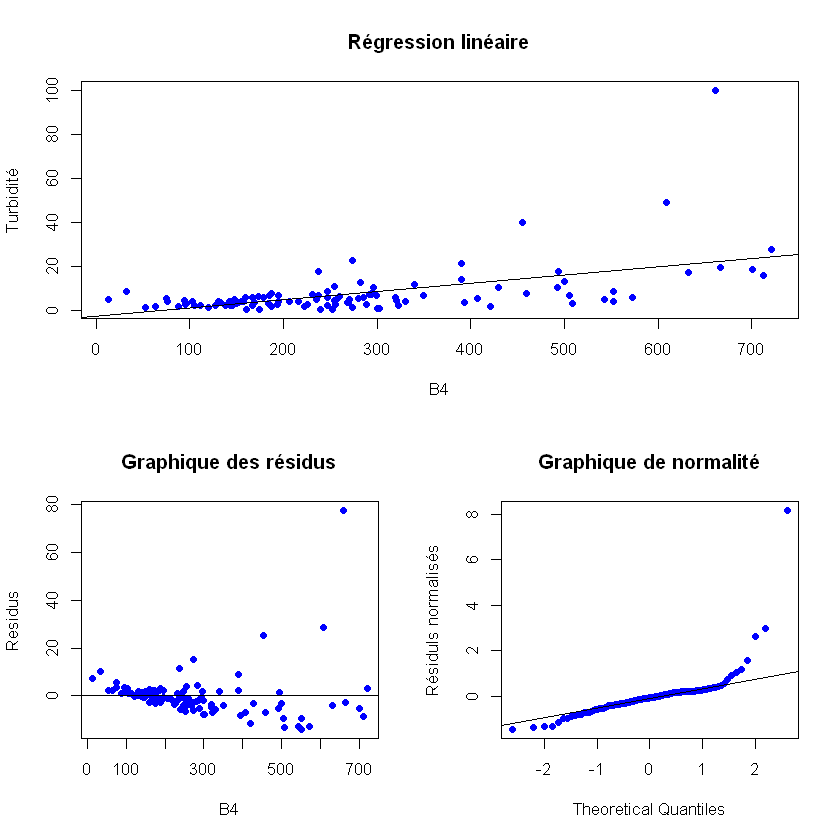

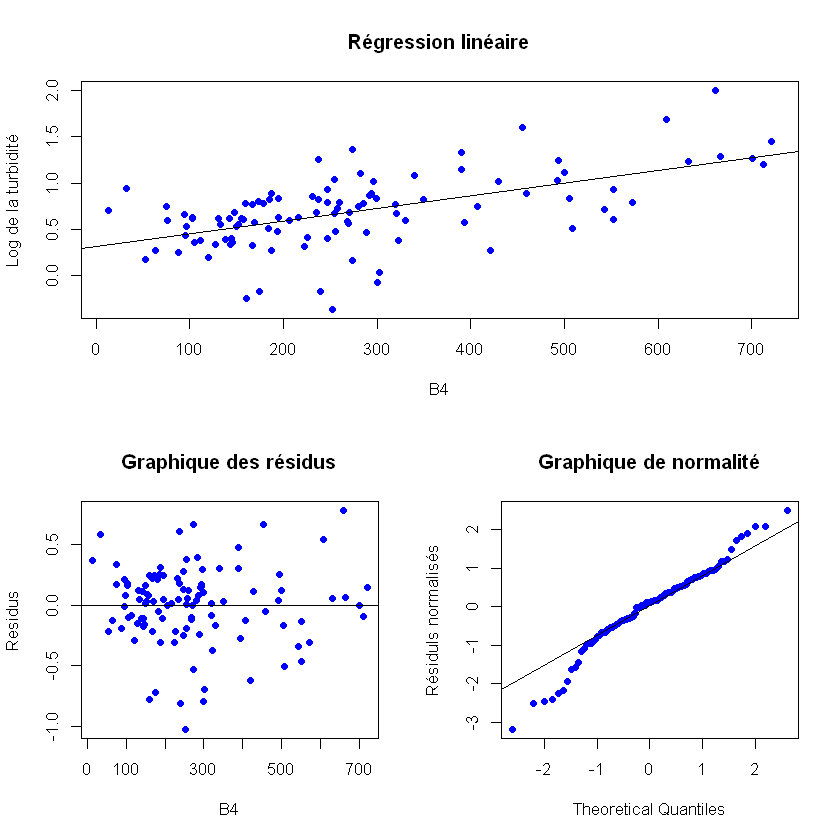

In [4]:
layout(matrix(c(1,1,2,3), 2, 2, byrow = TRUE))

x = data$B4
y = data$Turbidité
plot(x, y,
  xlab="B4",
  ylab="Turbidité",
    main="Régression linéaire",
    col="blue", pch = 16)
abline(lm(y ~ x))

res <- resid(fit)
plot(data$B4, res, 
    ylab="Residus", xlab="B4", 
    main="Graphique des résidus",
         col="blue", pch = 16) 
abline(0, 0)

stdres = rstandard(fit)
qqnorm(stdres, 
    ylab="Résiduls normalisés", 
    main="Graphique de normalité",
      col="blue", pch = 16) 
qqline(stdres)

##############################

layout(matrix(c(1,1,2,3), 2, 2, byrow = TRUE))

x1 = data$B4
y1 = data$log.turbi
plot(x1, y1,
  xlab="B4",
  ylab="Log de la turbidité",
    main="Régression linéaire",
    col="blue", pch = 16)
abline(lm(y1 ~ x1))

res <- resid(fitlog)
p <- plot(data$B4, res, 
    ylab="Residus", xlab="B4", 
    main="Graphique des résidus",
         col="blue", pch = 16) 
abline(0, 0)

stdres = rstandard(fitlog)
qqnorm(stdres, 
    ylab="Résiduls normalisés", 
    main="Graphique de normalité",
      col="blue", pch = 16) 
qqline(stdres)

# DEBIT

In [5]:
library(readxl)
dt <- read_excel(
    path = "Desktop\\Memoire\\bases_de_donnees\\jeux_donnees\\ii_débit.xlsx",
    sheet = 5, 
    col_names = TRUE)
head(dt,2)

Date,Turbidité,Débit
2015-01-01,19.08642,255.50
2015-01-02,18.84742,249.09


In [14]:
model <- Turbidité ~ Débit
fit <- lm(model, dt)
summ3 <- summary(fit)
summ3
mean(summ3$residuals^2)

dt$log.turbi <- log10(dt$Turbidité)
modelog <- log.turbi ~ Débit
fitlog <- lm(modelog, dt)
summ4 <- summary(fitlog)
summ4
mean(summ4$residuals^2)

dt$log.débit <- log10(dt$Débit)
modelog2 <- log.turbi ~ Débit
fitlog2 <- lm(modelog2, dt)
summ5 <- summary(fitlog2)
summ5
mean(summ5$residuals^2)


Call:
lm(formula = model, data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-54.224  -3.937  -1.046   1.637  78.974 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.315560   0.271654   8.524   <2e-16 ***
Débit       0.056040   0.001122  49.949   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12.46 on 3778 degrees of freedom
Multiple R-squared:  0.3977,	Adjusted R-squared:  0.3976 
F-statistic:  2495 on 1 and 3778 DF,  p-value: < 2.2e-16


[1] 155.2316


Call:
lm(formula = modelog, data = dt)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.33426 -0.20317  0.00046  0.21773  1.03912 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.599e-01  7.175e-03   78.04   <2e-16 ***
Débit       1.535e-03  2.963e-05   51.81   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3291 on 3778 degrees of freedom
Multiple R-squared:  0.4154,	Adjusted R-squared:  0.4152 
F-statistic:  2684 on 1 and 3778 DF,  p-value: < 2.2e-16


[1] 0.1082784


Call:
lm(formula = modelog2, data = dt)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.33426 -0.20317  0.00046  0.21773  1.03912 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.599e-01  7.175e-03   78.04   <2e-16 ***
Débit       1.535e-03  2.963e-05   51.81   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3291 on 3778 degrees of freedom
Multiple R-squared:  0.4154,	Adjusted R-squared:  0.4152 
F-statistic:  2684 on 1 and 3778 DF,  p-value: < 2.2e-16


[1] 0.1082784

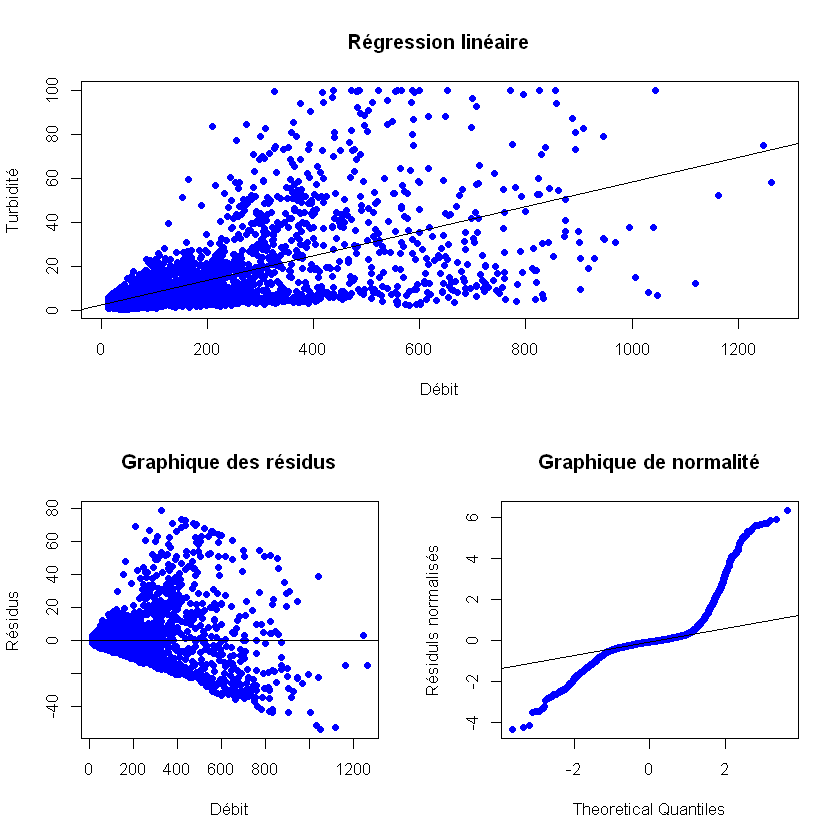

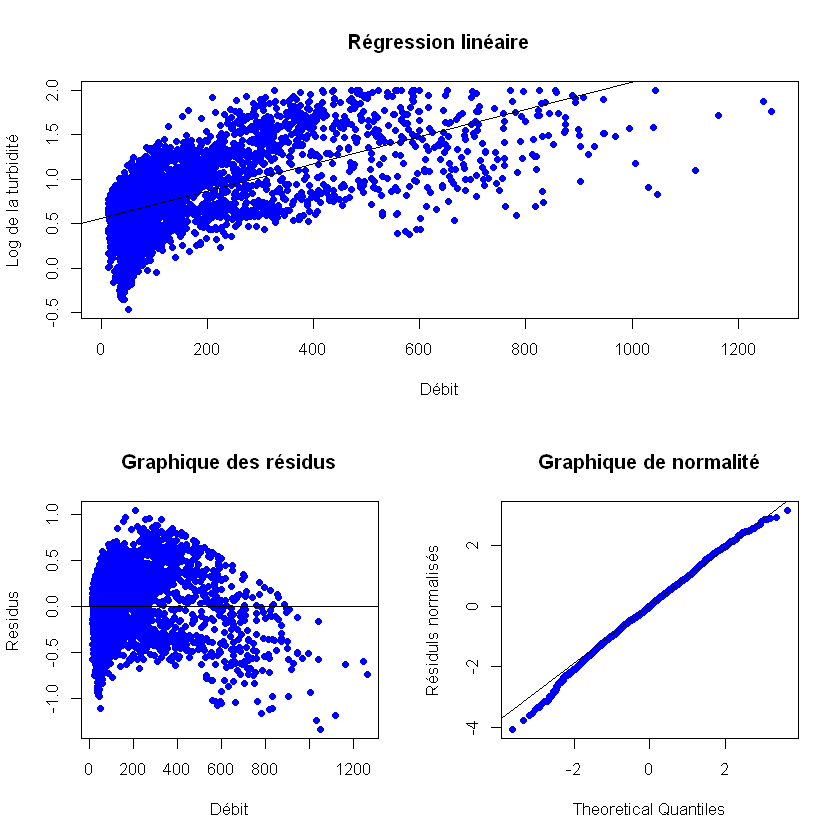

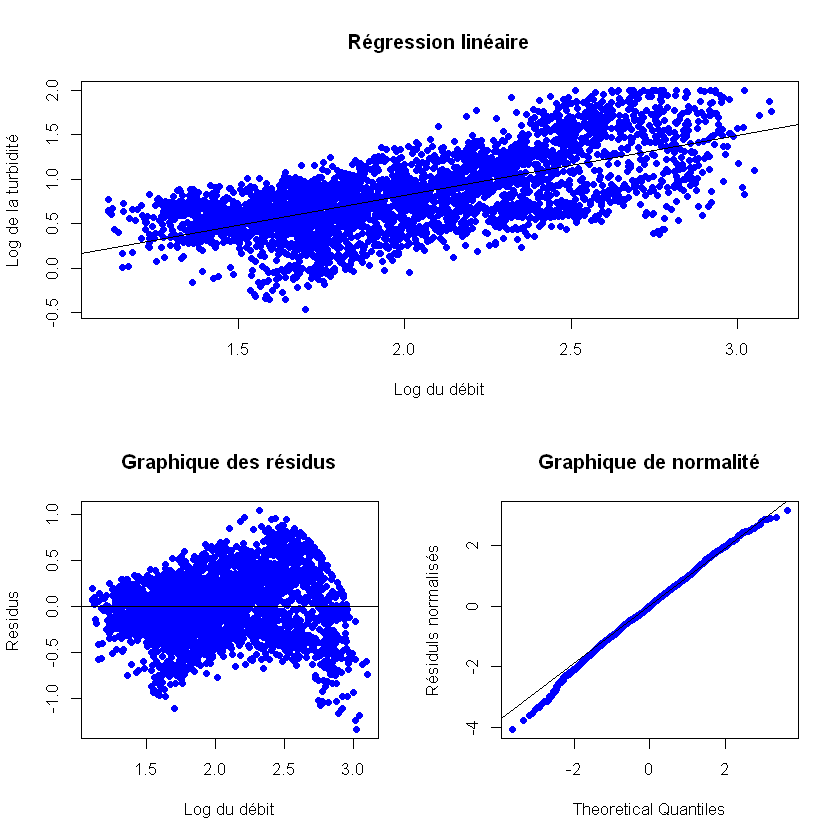

In [15]:
layout(matrix(c(1,1,2,3), 2, 2, byrow = TRUE))

x = dt$Débit
y = dt$Turbidité
plot(x, y,
  xlab="Débit",
  ylab="Turbidité",
    main="Régression linéaire",
    col="blue", pch = 16)
abline(lm(y ~ x))

res <- resid(fit)
plot(dt$Débit, res, 
    ylab="Résidus", xlab="Débit", 
    main="Graphique des résidus",
         col="blue", pch = 16) 
abline(0, 0)

stdres = rstandard(fit)
qqnorm(stdres, 
    ylab="Résiduls normalisés", 
    main="Graphique de normalité",
      col="blue", pch = 16) 
qqline(stdres)

############################## LOG TURBI ##############################

layout(matrix(c(1,1,2,3), 2, 2, byrow = TRUE))

x1 = dt$Débit
y1 = dt$log.turbi
plot(x1, y1,
  xlab="Débit",
  ylab="Log de la turbidité",
    main="Régression linéaire",
    col="blue", pch = 16)
abline(lm(y1 ~ x1))

res <- resid(fitlog)
plot(dt$Débit, res, 
    ylab="Residus", xlab="Débit", 
    main="Graphique des résidus",
         col="blue", pch = 16) 
abline(0, 0)

stdres = rstandard(fitlog)
qqnorm(stdres, 
    ylab="Résiduls normalisés", 
    main="Graphique de normalité",
      col="blue", pch = 16) 
qqline(stdres)

############################## LOG TURBI ET LOG DEBIT ##############################

layout(matrix(c(1,1,2,3), 2, 2, byrow = TRUE))

x2 = dt$log.débit
y2 = dt$log.turbi
plot(x2, y2,
  xlab="Log du débit",
  ylab="Log de la turbidité",
    main="Régression linéaire",
    col="blue", pch = 16)
abline(lm(y2 ~ x2))

res <- resid(fitlog2)
plot(dt$log.débit, res, 
    ylab="Residus", xlab="Log du débit", 
    main="Graphique des résidus",
         col="blue", pch = 16) 
abline(0, 0)

stdres = rstandard(fitlog2)
qqnorm(stdres, 
    ylab="Résiduls normalisés", 
    main="Graphique de normalité",
      col="blue", pch = 16) 
qqline(stdres)

# Précipitations

In [16]:
library(readxl)
df <- read_excel(
    path = "Desktop\\Memoire\\bases_de_donnees\\jeux_donnees\\iii_precip.xlsx",
    sheet = 5, 
    col_names = TRUE)
head(df,2)

Date,Turbidité,Précip
2015-01-01,19.08642,3.5
2015-01-02,18.84742,3.5


In [17]:
modelp <- Turbidité ~ Précip
fitp <- lm(modelp, df)
summ6 <- summary(fitp)
summ6
mean(summ6$residuals^2)

df$log.turbi <- log10(df$Turbidité)
modelogp <- log.turbi ~ Précip
fitlogp <- lm(modelogp, df)
summ7 <- summary(fitlogp)
summ7
mean(summ7$residuals^2)


Call:
lm(formula = modelp, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.267  -7.119  -3.601   1.139  91.863 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.48539    0.34124   19.01   <2e-16 ***
Précip       0.51374    0.02269   22.64   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 15.26 on 3621 degrees of freedom
Multiple R-squared:  0.124,	Adjusted R-squared:  0.1238 
F-statistic: 512.5 on 1 and 3621 DF,  p-value: < 2.2e-16


[1] 232.8887


Call:
lm(formula = modelogp, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.39289 -0.26942 -0.04815  0.24462  1.27695 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.683197   0.009067   75.35   <2e-16 ***
Précip      0.013499   0.000603   22.39   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4056 on 3621 degrees of freedom
Multiple R-squared:  0.1216,	Adjusted R-squared:  0.1213 
F-statistic: 501.2 on 1 and 3621 DF,  p-value: < 2.2e-16


[1] 0.1644374

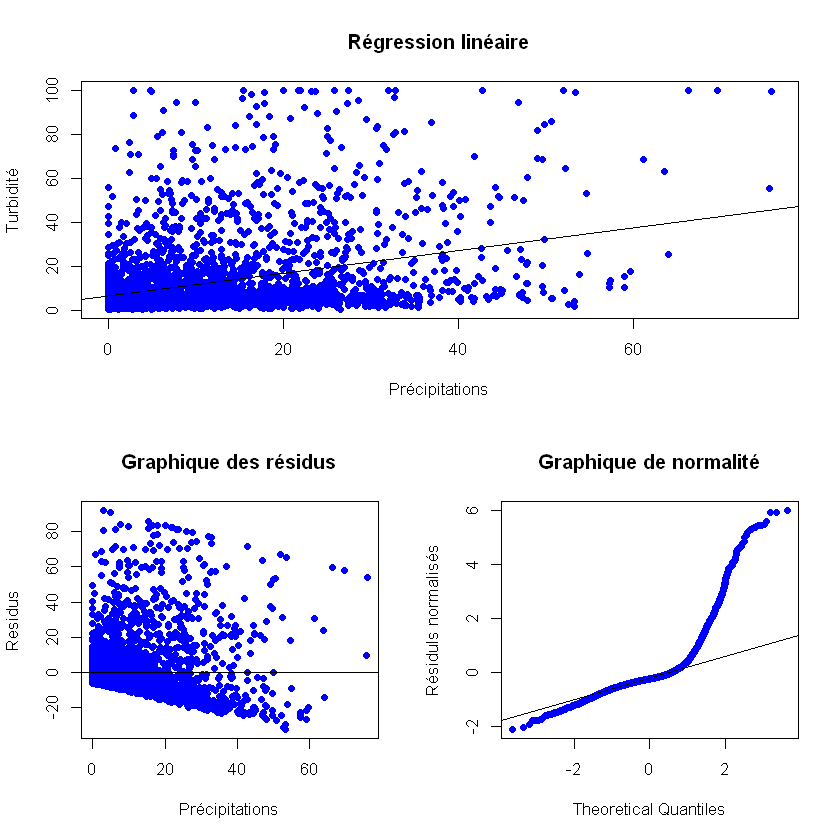

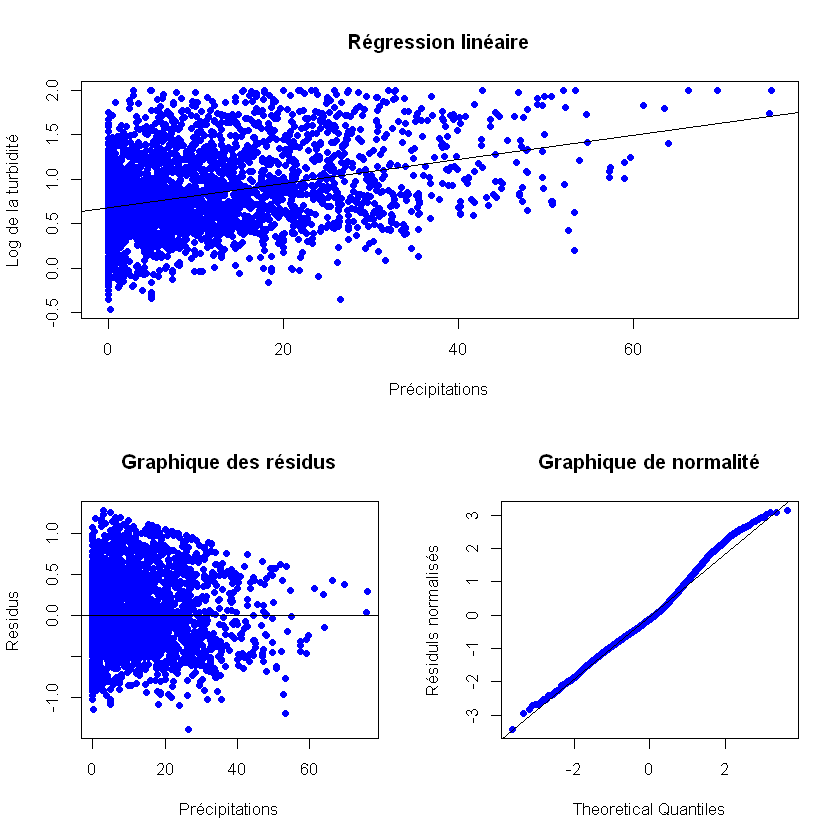

In [18]:
layout(matrix(c(1,1,2,3), 2, 2, byrow = TRUE))

x = df$Précip
y = df$Turbidité
plot(x, y,
  xlab="Précipitations",
  ylab="Turbidité",
    main="Régression linéaire",
    col="blue", pch = 16)
abline(lm(y ~ x))

resp <- resid(fitp)
plot(df$Précip, resp, 
    ylab="Residus", xlab="Précipitations", 
    main="Graphique des résidus",
    col="blue", pch = 16) 
abline(0, 0)

stdresp = rstandard(fitp)
qqnorm(stdresp, 
    ylab="Résiduls normalisés", 
    main="Graphique de normalité",
      col="blue", pch = 16) 
qqline(stdresp)

##############################

layout(matrix(c(1,1,2,3), 2, 2, byrow = TRUE))

x1 = df$Précip
y1 = df$log.turbi
plot(x1, y1,
  xlab="Précipitations",
  ylab="Log de la turbidité",
    main="Régression linéaire",
    col="blue", pch = 16)
abline(lm(y1 ~ x1))

resplog <- resid(fitlogp)
plot(df$Précip, resplog, 
    ylab="Residus", xlab="Précipitations", 
    main="Graphique des résidus",
    col="blue", pch = 16) 
abline(0, 0)

stdrespl = rstandard(fitlogp)
qqnorm(stdrespl, 
    ylab="Résiduls normalisés", 
    main="Graphique de normalité",
      col="blue", pch = 16) 
qqline(stdrespl)